In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [115]:
house_data = pd.read_csv('kc_house_data.csv')

house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [122]:
house_data.dropna(axis=1).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [123]:
house_data.isnull().sum(axis=0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [161]:
new_data = house_data[['yr_built','yr_renovated','sqft_living15','view','waterfront','bedrooms','bathrooms','floors','condition','grade','price']]

In [162]:
new_data.describe()

,yr_built,yr_renovated,sqft_living15,view,waterfront,bedrooms,bathrooms,floors,condition,grade,price
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,1971.005136,84.402258,1986.552492,0.234303,0.007542,3.370842,2.114757,1.494309,3.409430,7.656873,5.400881e+05
std,29.373411,401.679240,685.391304,0.766318,0.086517,0.930062,0.770163,0.539989,0.650743,1.175459,3.671272e+05
min,1900.000000,0.000000,399.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,7.500000e+04
25%,1951.000000,0.000000,1490.000000,0.000000,0.000000,3.000000,1.750000,1.000000,3.000000,7.000000,3.219500e+05
50%,1975.000000,0.000000,1840.000000,0.000000,0.000000,3.000000,2.250000,1.500000,3.000000,7.000000,4.500000e+05
75%,1997.000000,0.000000,2360.000000,0.000000,0.000000,4.000000,2.500000,2.000000,4.000000,8.000000,6.450000e+05
max,2015.000000,2015.000000,6210.000000,4.000000,1.000000,33.000000,8.000000,3.500000,5.000000,13.000000,7.700000e+06


In [139]:
house_clean = new_data.reset_index(drop=True)
house_clean.head()

,yr_built,yr_renovated,sqft_living15,view,waterfront,bedrooms,bathrooms,floors,condition,grade,price
0,1955,0,1340,0,0,3,1.00,1.0,3,7,221900.0
1,1951,1991,1690,0,0,3,2.25,2.0,3,7,538000.0
2,1933,0,2720,0,0,2,1.00,1.0,3,6,180000.0
3,1965,0,1360,0,0,4,3.00,1.0,5,7,604000.0
4,1987,0,1800,0,0,3,2.00,1.0,3,8,510000.0


In [140]:
renovated_df = house_clean[house_clean['yr_renovated'] != 0]
not_renovated_df = house_clean[house_clean['yr_renovated'] == 0]

In [141]:
renovated_df.head()

,yr_built,yr_renovated,sqft_living15,view,waterfront,bedrooms,bathrooms,floors,condition,grade,price
1,1951,1991,1690,0,0,3,2.25,2.0,3,7,538000.0
35,1930,2002,1590,0,0,3,2.50,1.5,3,8,696000.0
95,1946,1991,1950,0,0,4,2.50,1.0,3,7,905000.0
103,1950,2010,2370,0,0,3,2.50,2.0,3,8,1088000.0
115,1900,1999,1830,0,0,3,3.50,2.0,3,8,740500.0


In [142]:
renovated_df.describe()

,yr_built,yr_renovated,sqft_living15,view,waterfront,bedrooms,bathrooms,floors,condition,grade,price
count,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,9.140000e+02
mean,1939.527352,1995.827133,1977.565646,0.613786,0.045952,3.452954,2.298961,1.510394,3.223195,7.735230,7.603790e+05
std,22.621409,15.517107,704.283165,1.219891,0.209495,1.040514,0.890498,0.494937,0.519571,1.205103,6.077348e+05
min,1900.000000,1934.000000,828.000000,0.000000,0.000000,1.000000,0.750000,1.000000,1.000000,4.000000,1.100000e+05
25%,1920.250000,1987.000000,1460.000000,0.000000,0.000000,3.000000,1.750000,1.000000,3.000000,7.000000,4.012500e+05
50%,1942.000000,2000.000000,1835.000000,0.000000,0.000000,3.000000,2.250000,1.500000,3.000000,8.000000,6.000000e+05
75%,1955.000000,2007.000000,2350.000000,0.000000,0.000000,4.000000,2.750000,2.000000,3.000000,8.000000,9.000000e+05
max,2003.000000,2015.000000,5500.000000,4.000000,1.000000,11.000000,8.000000,3.000000,5.000000,13.000000,7.700000e+06


In [167]:
not_renovated_df['bedrooms'].max()

33

In [144]:
not_renovated_df.describe()

,yr_built,yr_renovated,sqft_living15,view,waterfront,bedrooms,bathrooms,floors,condition,grade,price
count,20699.000000,20699.0,20699.000000,20699.000000,20699.000000,20699.000000,20699.000000,20699.000000,20699.000000,20699.000000,2.069900e+04
mean,1972.395092,0.0,1986.949321,0.217547,0.005846,3.367216,2.106624,1.493599,3.417653,7.653413,5.303608e+05
std,28.855465,0.0,684.559825,0.735454,0.076235,0.924741,0.763414,0.541892,0.654721,1.174042,3.495780e+05
min,1900.000000,0.0,399.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,7.500000e+04
25%,1953.000000,0.0,1490.000000,0.000000,0.000000,3.000000,1.500000,1.000000,3.000000,7.000000,3.200000e+05
50%,1977.000000,0.0,1840.000000,0.000000,0.000000,3.000000,2.250000,1.500000,3.000000,7.000000,4.480000e+05
75%,1998.000000,0.0,2360.000000,0.000000,0.000000,4.000000,2.500000,2.000000,4.000000,8.000000,6.344000e+05
max,2015.000000,0.0,6210.000000,4.000000,1.000000,33.000000,8.000000,3.500000,5.000000,13.000000,6.885000e+06


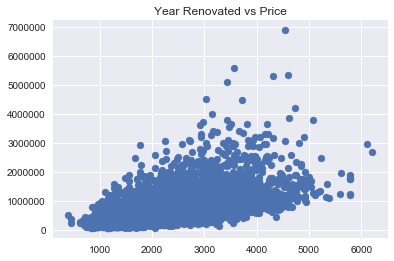

In [209]:
plt.scatter(not_renovated_df['sqft_living15'],not_renovated_df['price'])
plt.title("Year Renovated vs Price")

plt.show()

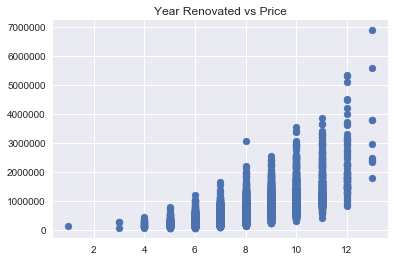

In [210]:
plt.scatter(not_renovated_df['grade'],not_renovated_df['price'])
plt.title("Year Renovated vs Price")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


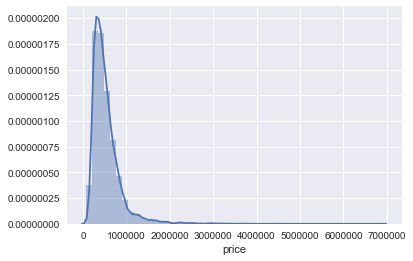

In [169]:
sns.distplot(not_renovated_df['price'])

In [191]:
q = not_renovated_df['price'].quantile(0.99)
new_data = not_renovated_df[not_renovated_df['price'] < q ]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


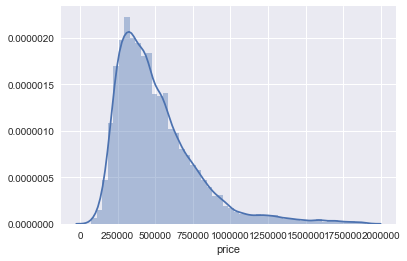

In [192]:
sns.distplot(new_data['price'])

In [193]:
q = new_data['price'].quantile(0.99)
data = new_data[new_data['price'] < q]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


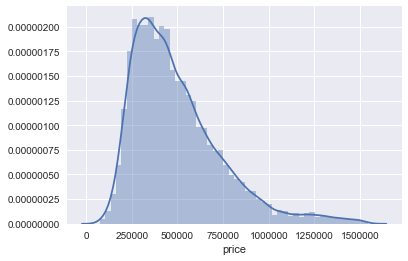

In [195]:
sns.distplot(data['price'])

In [232]:
data.describe()

,yr_built,yr_renovated,sqft_living15,view,waterfront,bedrooms,bathrooms,floors,condition,grade,price
count,20278.000000,20278.0,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,20278.000000,2.027800e+04
mean,1972.233406,0.0,1959.237154,0.188973,0.002910,3.349196,2.076351,1.485354,3.415327,7.596065,4.970011e+05
std,28.775660,0.0,652.410711,0.674238,0.053863,0.916129,0.729649,0.540063,0.652767,1.104188,2.458291e+05
min,1900.000000,0.0,399.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,7.500000e+04
25%,1953.000000,0.0,1480.000000,0.000000,0.000000,3.000000,1.500000,1.000000,3.000000,7.000000,3.170000e+05
50%,1976.000000,0.0,1820.000000,0.000000,0.000000,3.000000,2.250000,1.000000,3.000000,7.000000,4.400000e+05
75%,1998.000000,0.0,2330.000000,0.000000,0.000000,4.000000,2.500000,2.000000,4.000000,8.000000,6.190000e+05
max,2015.000000,0.0,5790.000000,4.000000,1.000000,33.000000,7.500000,3.500000,5.000000,12.000000,1.545000e+06


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


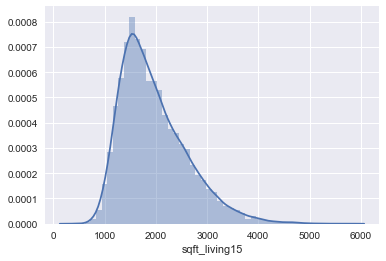

In [197]:
sns.distplot(data['sqft_living15'])

In [203]:
q = data['sqft_living15'].quantile(0.99)
clean_data = data[data['sqft_living15'] < q]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


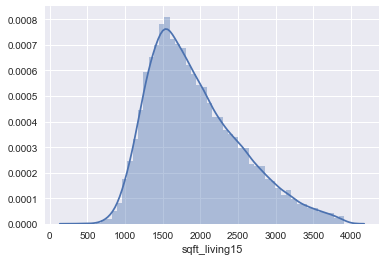

In [204]:
sns.distplot(clean_data['sqft_living15'])

In [212]:
house_df = clean_data[['sqft_living15','price']]

In [213]:
house_df.head()

,sqft_living15,price
0,1340,221900.0
2,2720,180000.0
3,1360,604000.0
4,1800,510000.0
6,2238,257500.0


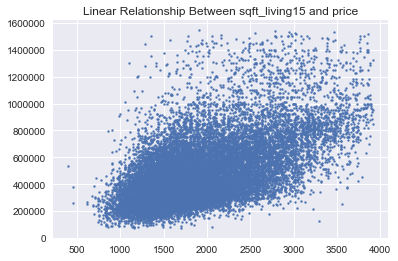

In [225]:
plt.scatter(house_df['sqft_living15'],house_df['price'],s=4)
plt.title("Linear Relationship Between sqft_living15 and price")

plt.show()

In [223]:
house_data = house_df.reset_index(drop=True) 


house_data.head()

,sqft_living15,price
0,1340,221900.0
1,2720,180000.0
2,1360,604000.0
3,1800,510000.0
4,2238,257500.0


In [227]:
house_data['price'] = np.log(house_data['price'])

In [230]:
house_data.describe()

,sqft_living15,price
count,20062.000000,20062.000000
mean,1934.044562,12.994705
std,607.617508,0.467802
min,399.000000,11.225243
25%,1480.000000,12.660328
50%,1820.000000,12.994416
75%,2300.000000,13.321214
max,3910.000000,14.250534


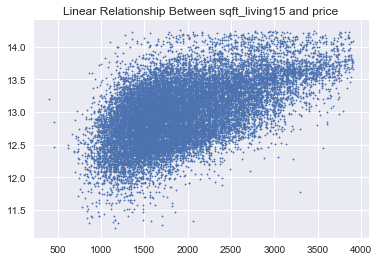

In [231]:
plt.scatter(house_data['sqft_living15'],house_data['price'],s=2)
plt.title("Linear Relationship Between sqft_living15 and price")

plt.show()

In [236]:
_input = house_data['sqft_living15'].values.reshape(-1,1)
_target = house_data['price'].values.reshape(-1,1)

In [237]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(_input)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [238]:
input_scaled = scaler.transform(_input)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [239]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled, _target,test_size=0.2, random_state=365)

In [240]:
reg = LinearRegression()

reg.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [241]:
y_hat = reg.predict(x_train)

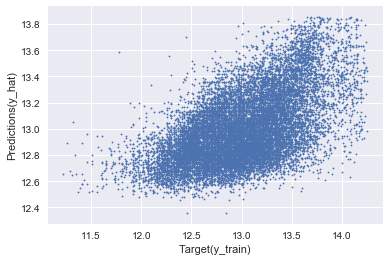

In [243]:
plt.scatter(y_train,y_hat,s=2)
plt.xlabel('Target(y_train)')
plt.ylabel('Predictions(y_hat)')

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Training data Residuals PDF')

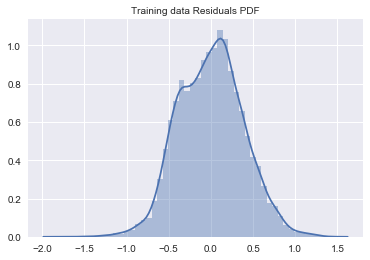

In [246]:
sns.distplot(y_train - y_hat)
plt.title('Training data Residuals PDF',size=10)

In [247]:
reg.score(x_train,y_train)

0.3212815418217066

In [248]:
r2 = reg.score(x_train,y_train)
n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.32123924616157207